# Análise Exploratória de Dados do Campeonato Brasileiro de Futebol (2003-2023)

Este projeto tem como objetivo realizar uma Análise Exploratória de Dados (EDA) dos dados do Campeonato Brasileiro de Futebol, cobrindo os anos de 2003 a 2023. Através desta EDA, buscamos fornecer insights detalhados sobre o desempenho dos times, jogadores, estatísticas de jogos, gols e cartões ao longo deste período.

Utilizando dados de fontes confiáveis, como sites de estatísticas de futebol e a base de dados oficial da CBF, a análise aborda aspectos como o número de jogos, gols, vitórias, empates, derrotas, além de métricas detalhadas de jogadores e técnicos.

Com o uso de técnicas de visualização de dados e análise estatística, identificamos padrões, tendências e anomalias que podem ser úteis para fãs, analistas esportivos e profissionais do futebol.

Este projeto também serve como um recurso valioso para entender a evolução do campeonato e as dinâmicas que influenciam o desempenho dos participantes ao longo dos anos.

#### **Descrição dos Dados**
- **Período:** 2003 a 2023.
- **Fonte de Dados:** https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol.
- **Variáveis Incluídas:** 
  - Jogos: ID da partida, rodada, data, horário, dia, times, placar, local
  - Estatísticas: finalizações, posse de bola, passes, faltas, cartões, impedimentos, escanteios
  - Gols: minuto, jogador
  - Cartões: minuto, jogador, tipo de cartãos


## Sumário do Projeto

### [1. Preparação dos Dados](#preparacao-dos-dados)
- [Importação de Bibliotecas](#importacao-de-bibliotecas)
- [Dicionário dos Dados](#dicionario-dos-dados)
- [Importação dos Dados das Fontes](#importacao-dos-dados-das-fontes)
- [Verificação da Integridade dos Dados](#verificacao-da-integridade-dos-dados)
- [Visão Geral dos Datasets](#visao-geral-dos-datasets)
- [Limpeza dos Dados](#limpeza-dos-dados)
  - [Verificando Outliers](#verificando-outliers)
  - [Tratamento de Valores Ausentes](#tratamento-de-valores-ausentes)
  - [Correção de Inconsistências](#correcao-de-inconsistencias)
  - [Normalização dos Dados](#normalizacao-dos-dados)
### [2. Análise Descritiva](#analise-descritiva)
- [Estatísticas Gerais](#estatisticas-gerais)
  - [Número Total de Jogos por Temporada](#numero-total-de-jogos-por-temporada)
  - [Média de Gols por Jogo por Temporada](#media-de-gols-por-jogo-por-temporada)
- [Times](#times)
  - [Número de Vitórias por Time](#numero-de-vitorias-por-time)
  - [Comparação de Desempenho entre Times (Melhores Ataques, Melhores Defesas)](#comparacao-de-desempenho-entre-times)
- [Jogadores](#jogadores)
  - [Top 10 Jogadores que Mais Fizeram Gols](#top-10-jogadores-que-mais-fizeram-gols)
  - [Top 10 Jogadores que Mais Fizeram Infrações](#top-10-jogadores-que-mais-fizeram-infracoes)
- [Cartões](#cartoes)
  - [Número de Cartões Amarelos por Temporada](#numero-de-cartoes-amarelos-por-temporada)
  - [Número de Cartões Vermelhos por Temporada](#numero-de-cartoes-vermelhos-por-temporada)
  - [Top 10 Times Mais Indisciplinados](#top-10-times-mais-indisciplinados)
  - [Jogadores Mais Penalizados](#jogadores-mais-penalizados)
### [3. Análises Temporais](#analises-temporais)
- [Número Total de Gols por Temporada ao Longo dos Anos](#numero-total-de-gols-por-temporada-ao-longo-dos-anos)
- [Comportamento de Gols Marcados por Mandantes e Visitantes](#comportamento-de-gols-marcados-por-mandantes-e-visitantes)
- [Vitórias por Visitante e Mandante por Temporada](#vitorias-por-visitante-e-mandante-por-temporada)
- [Mudanças no Desempenho dos Times ao Longo das Temporadas](#mudancas-no-desempenho-dos-times-ao-longo-das-temporadas)
- [Evolução do Número de Cartões ao Longo dos Anos](#evolucao-do-numero-de-cartoes-ao-longo-dos-anos)
### [4. Análise de Desempenho](#analise-de-desempenho)
- [Times](#times-desempenho)
  - [Análise Aproveitamento como Mandante](#analise-aproveitamento-como-mandante)
  - [Análise Aproveitamento como Visitante](#analise-aproveitamento-como-visitante)
  - [Times com Maior Número de Empate](#times-com-maior-numero-de-empate)
  - [Análise de Média de Gols por Período de Jogo](#analise-de-media-de-gols-por-periodo-de-jogo)
  - [Probabilidade de Vitória com Base nos Gols Marcados por Tempo](#probabilidade-de-vitoria-com-base-nos-gols-marcados-por-tempo)
### [5. Análises Geográficas](#analises-geograficas)
- [Desempenho por Regiões](#desempenho-por-regioes)
- [Comparação entre Times de Diferentes Estados/Regiões](#comparacao-entre-times-de-diferentes-estados-regioes)
### [6. Análises Avançadas](#analises-avancadas)
- [Análise de Clusters](#analise-de-clusters)
  - [Agrupamento de Times por Desempenho Similar](#agrupamento-de-times-por-desempenho-similar)

## <a id="preparacao-dos-dados"></a>1. **Preparação dos Dados**

#### <a id="importacao-de-bibliotecas"></a>**Importação de Bibliotecas**

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#### <a id="dicionario-dos-dados"></a>**Dicionário dos dados**

Legenda - campeonato-brasileiro-full.csv
ID - ID da partida
Rodada : Rodada que aconteceu a partida
Data : Data que ocorreu a partida
Horário :  Horário que ocorreu a partida
Dia : Dia da semana que ocorreu a partida
Mandante : Clube mandante                      
Visitante : Clube Visitante
formacao_mandante: Formação do mandante
formacao_visitante: Formação do visitante
tecnico_mandante: Técnico do mandante
tecnico_visitante: Técnico do visitante
Vencedor : Clube vencedor da partida. Quando tiver "-", é um empate
Arena : Arena que ocorreu a partida                      
Mandante Placar : Gols que o clube mandante fez na partida                      
Visitante Placar : Gols que o clube visitante fez na partida                      
Estado Mandante : Estado do clube mandatorio                      
Estado Visitante : Estado do clube visitante                      
Estado Vencedor : Estado do clube vencedor. Quando tiver "-", é um empate

Legenda - campeonato-brasileiro-estatisticas-full.csv
partida_ID - ID da partida
Rodada - Rodada da partida
Clube - Nome do clube
Chutes - Finalizações
Chutes a gol - Finalizações na direção do gol
Posse de bola - Percentual da posse de bola
Passes - Quantidade de passes que o clube deu na partida
precisao_passes - Percentual da precisão de passe
Faltas - Quantidade de faltas cometidas na partida
cartao_amarelo - Quantidade de cartões amarelos para o clube na partida
cartao_vermelho - Quantidade de cartões vermelhos para o clube na partida
Impedimentos - Quantidade de impedimentos para o clube na partida
Escanteios - Quantidade de escanteios para o clube na partida

Legenda - campeonato-brasileiro-gols.csv
partida_ID - ID da partida
Rodada - Rodada da partida
Clube - Nome do clube
Atleta - Nome do atleta que fez o gol
Minuto - Minuto na partida em que o gol foi marcado

Legenda - campeonato-brasileiro-cartoes.csv
partida_ID - ID da partida
Rodada - Rodada da partida
Clube - Nome do clube
Cartao - Cor do cartão aplicado
Atleta - Nome do atleta punido pelo cartão
num_camisa - Número da camisa do atleta
Posicao - Posição na partida em que o atleta se encontra
Minuto - Minuto na partida em que o cartão foi aplicado

#### <a id="importacao-dos-dados-das-fontes"></a>**Importação dos Dados das Fontes**

In [8]:
df_partidas = pd.read_csv("C:/Users/USER/Desktop/Particular/Futebol/campeonato-brasileiro-full.csv")
df_estatisticas = pd.read_csv("C:/Users/USER/Desktop/Particular/Futebol/campeonato-brasileiro-estatisticas-full.csv")
df_gols = pd.read_csv("C:/Users/USER/Desktop/Particular/Futebol/campeonato-brasileiro-gols.csv")
df_cartoes = pd.read_csv("C:/Users/USER/Desktop/Particular/Futebol/campeonato-brasileiro-cartoes.csv")

#### <a id="verificacao-da-integridade-dos-dados"></a>**Verificação da Integridade dos Dados**

In [11]:
print(df_partidas.info())
print(df_estatisticas.info())
print(df_gols.info())
print(df_cartoes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8405 non-null   int64 
 1   rodata              8405 non-null   int64 
 2   data                8405 non-null   object
 3   hora                8405 non-null   object
 4   mandante            8405 non-null   object
 5   visitante           8405 non-null   object
 6   formacao_mandante   3431 non-null   object
 7   formacao_visitante  3431 non-null   object
 8   tecnico_mandante    3795 non-null   object
 9   tecnico_visitante   3795 non-null   object
 10  vencedor            8405 non-null   object
 11  arena               8405 non-null   object
 12  mandante_Placar     8405 non-null   int64 
 13  visitante_Placar    8405 non-null   int64 
 14  mandante_Estado     8405 non-null   object
 15  visitante_Estado    8405 non-null   object
dtypes: int64(4), object(12)


#### <a id="visao-geral-dos-datasets"></a>**Visão Geral dos Datasets**

In [14]:
display(df_partidas.head(5))
display(df_estatisticas.head(5))
display(df_gols.head(5))
display(df_cartoes.head(5))

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Coritiba,0,0,NaN,0,NaN,0,0,0,0,0


,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra
1,4607,1,Fluminense,Fred,45,Penalty
2,4607,1,Fluminense,Rafael Sóbis,31,NaN
3,4608,1,Internacional,Charles Aránguiz,6,NaN
4,4612,1,Cruzeiro,Nílton Ferreira Júnior,63,NaN


,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
1,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44
2,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
3,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86
4,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10


#### <a id="limpeza-dos-dados"></a>**Limpeza dos Dados**

#### <a id="verificando-outliers"></a>**Verificando Outliers**

In [18]:
# Identificar colunas quantitativas (numéricas)
quantitative_columns_partidas = df_partidas.select_dtypes(include=['number']).columns
quantitative_columns_estatisticas = df_estatisticas.select_dtypes(include=['number']).columns
quantitative_columns_gols = df_gols.select_dtypes(include=['number']).columns
quantitative_columns_cartoes = df_cartoes.select_dtypes(include=['number']).columns

print("Colunas quantitativas em df_partidas:")
print(quantitative_columns_partidas)

print("\nColunas quantitativas em df_estatisticas:")
print(quantitative_columns_estatisticas)

print("\nColunas quantitativas em df_gols:")
print(quantitative_columns_gols)

print("\nColunas quantitativas em df_cartoes:")
print(quantitative_columns_cartoes)

Colunas quantitativas em df_partidas:
Index(['ID', 'rodata', 'mandante_Placar', 'visitante_Placar'], dtype='object')

Colunas quantitativas em df_estatisticas:
Index(['partida_id', 'rodata', 'chutes', 'chutes_no_alvo', 'passes', 'faltas',
       'cartao_amarelo', 'cartao_vermelho', 'impedimentos', 'escanteios'],
      dtype='object')

Colunas quantitativas em df_gols:
Index(['partida_id', 'rodata'], dtype='object')

Colunas quantitativas em df_cartoes:
Index(['partida_id', 'rodata', 'num_camisa'], dtype='object')


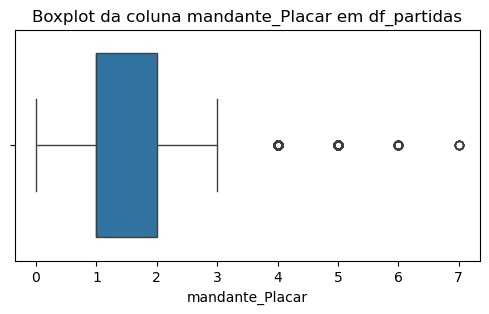

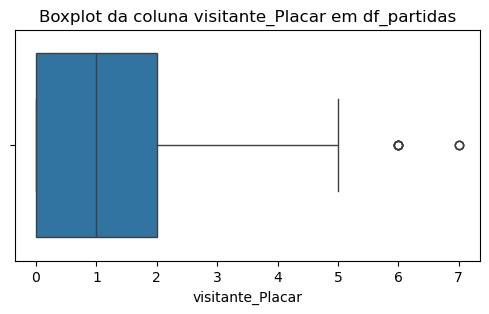

Outliers em df_partidas:
Coluna mandante_Placar: 594 outliers
Coluna visitante_Placar: 9 outliers


In [20]:
# Colunas específicas para análise de outliers em df_partidas
columns_partidas = ['mandante_Placar', 'visitante_Placar']

# Visualização de outliers com Boxplot
for column in columns_partidas:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_partidas[column])
    plt.title(f'Boxplot da coluna {column} em df_partidas')
    plt.show()

# Detecção de outliers com IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    return outliers

print("Outliers em df_partidas:")
for column in columns_partidas:
    outliers = detect_outliers_iqr(df_partidas[column])
    num_outliers = len(outliers)
    print(f"Coluna {column}: {num_outliers} outliers")

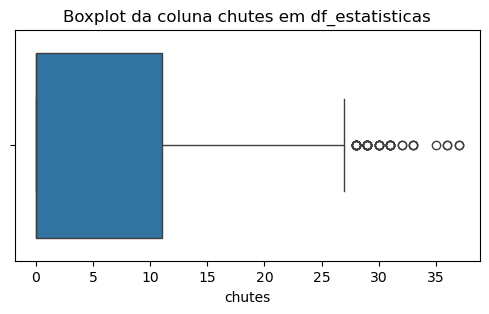

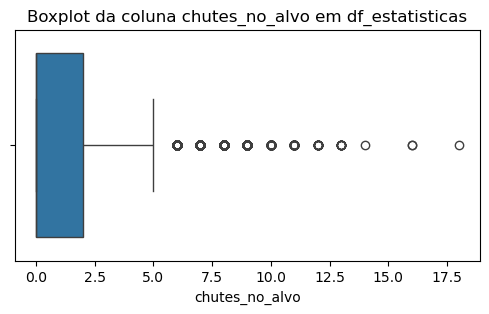

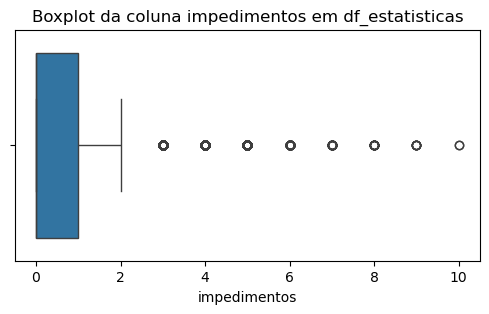

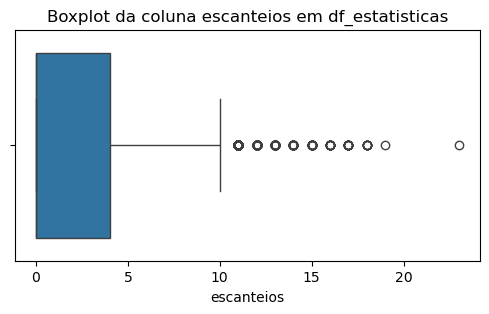


Outliers em df_estatisticas:
Coluna chutes: 45 outliers
Coluna chutes_no_alvo: 1466 outliers
Coluna impedimentos: 1598 outliers
Coluna escanteios: 396 outliers


In [22]:
# Colunas específicas para análise de outliers em df_estatisticas
columns_estatisticas = ['chutes', 'chutes_no_alvo', 'impedimentos', 'escanteios']

# Visualização de outliers com Boxplot
for column in columns_estatisticas:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_estatisticas[column])
    plt.title(f'Boxplot da coluna {column} em df_estatisticas')
    plt.show()

print("\nOutliers em df_estatisticas:")
for column in columns_estatisticas:
    outliers = detect_outliers_iqr(df_estatisticas[column])
    num_outliers = len(outliers)
    print(f"Coluna {column}: {num_outliers} outliers")

#### <a id="tratamento-de-valores-ausentes"></a>**Tratamento de Valores Ausentes**

In [25]:
missing_partidas = df_partidas.isnull().sum()
print("Valores ausentes em df_partidas:")
print(missing_partidas[missing_partidas > 0])

# Identificar valores ausentes em df_gols
missing_gols = df_gols.isnull().sum()
print("\nValores ausentes em df_gols:")
print(missing_gols[missing_gols > 0])

# Identificar valores ausentes em df_estatisticas
missing_estatisticas = df_estatisticas.isnull().sum()
print("\nValores ausentes em df_estatisticas:")
print(missing_estatisticas[missing_estatisticas > 0])

# Identificar valores ausentes em df_cartoes
missing_cartoes = df_cartoes.isnull().sum()
print("\nValores ausentes em df_cartoes:")
print(missing_cartoes[missing_cartoes > 0])

Valores ausentes em df_partidas:
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
dtype: int64

Valores ausentes em df_gols:
tipo_de_gol    7843
dtype: int64

Valores ausentes em df_estatisticas:
posse_de_bola       9990
precisao_passes    12298
dtype: int64

Valores ausentes em df_cartoes:
atleta           6
num_camisa     386
posicao       1198
dtype: int64


In [27]:
df_partidas.fillna('Desconhecido', inplace=True)
df_estatisticas.fillna(0, inplace=True)
df_gols.dropna(subset=['atleta'], inplace=True)
df_cartoes.dropna(subset=['atleta'], inplace=True)

#### <a id="correcao-de-inconsistencias"></a>**Correção de Inconsistências**

In [30]:
df_partidas['mandante'] = df_partidas['mandante'].str.strip()
df_partidas['visitante'] = df_partidas['visitante'].str.strip()

#### <a id="normalizacao-dos-dados"></a>**Normalização dos Dados**

In [33]:
df_partidas['mandante'] = df_partidas['mandante'].str.lower()
df_partidas['visitante'] = df_partidas['visitante'].str.lower()

## <a id="analise-descritiva"></a>2. **Análise Descritiva**

#### <a id="estatisticas-gerais"></a>**Estatíticas Gerais**

#### <a id="numero-total-de-jogos-por-temporada"></a>**Número Total de Jogos por Temporada**

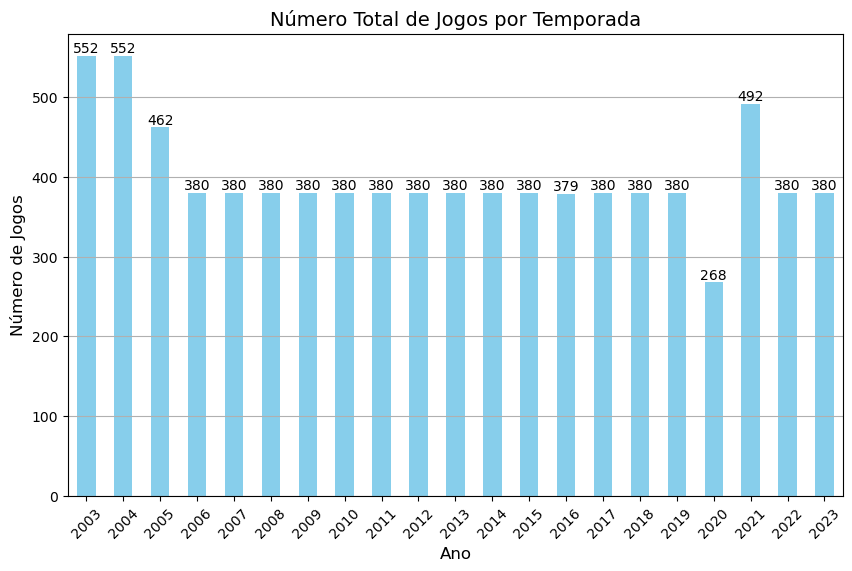

In [38]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y', dayfirst=True)

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Calcular o número de jogos por ano
jogos_por_ano = df_partidas.groupby('ano').size()

# Plotar o gráfico de barras com rótulos de dados
plt.figure(figsize=(10, 6))
ax = jogos_por_ano.plot(kind='bar', color='skyblue')
plt.title('Número Total de Jogos por Temporada', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Jogos', fontsize=12)
plt.grid(axis='y')

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.xticks(rotation=45)
plt.show()

#### <a id="media-de-gols-por-jogo-por-temporada"></a>**Média de Gols por Jogo por Temporada**

<Figure size 1200x600 with 0 Axes>

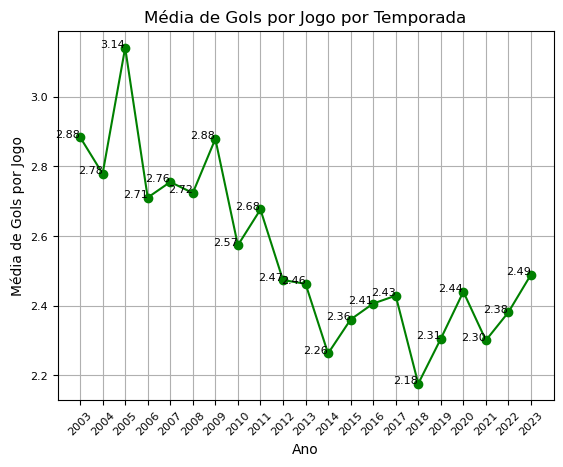

In [41]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Calcular a média de gols por jogo por temporada
df_partidas['total_gols'] = df_partidas['mandante_Placar'] + df_partidas['visitante_Placar']
media_gols_jogo = df_partidas.groupby('ano')['total_gols'].mean().reset_index()

# Plotar o gráfico de média de gols por jogo por temporada
plt.figure(figsize=(12, 6))
ax = media_gols_jogo.plot(x='ano', y='total_gols', kind='line', marker='o', color='green', legend=False)
plt.title('Média de Gols por Jogo por Temporada')
plt.xlabel('Ano')
plt.ylabel('Média de Gols por Jogo')
plt.xticks(ticks=range(2003, 2024), fontsize=8, rotation=45)  # Define os rótulos do eixo x de 2003 a 2023
plt.yticks(fontsize=8)
plt.grid()

# Adicionar rótulos de dados
for x, y in zip(media_gols_jogo['ano'], media_gols_jogo['total_gols']):
    plt.text(x, y, f'{y:.2f}', ha='right', fontsize=8)

plt.show()

#### <a id="times"></a>**Times**

#### <a id="numero-de-vitorias-por-time"></a>**Número de Vitórias por Time**

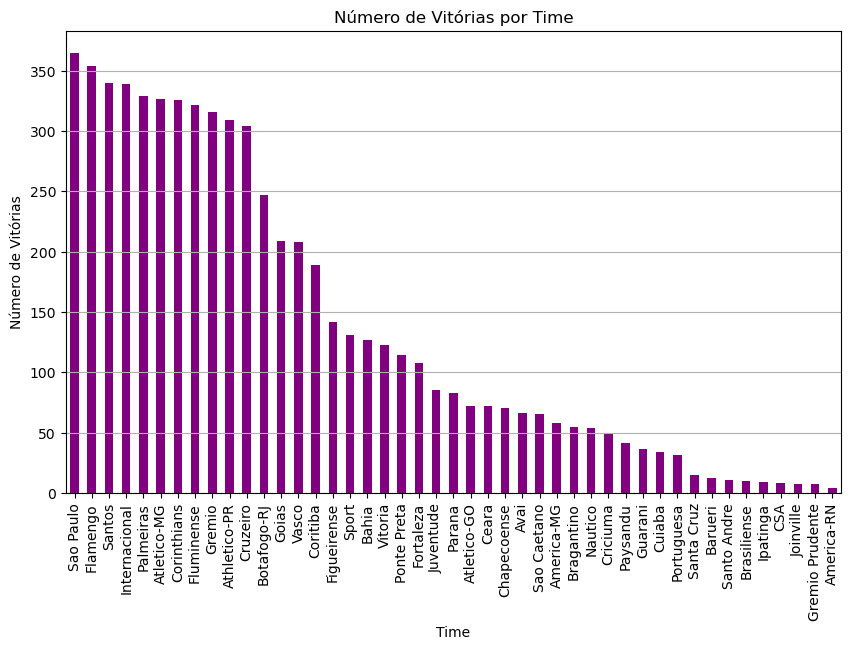

In [45]:
titulos_por_time = df_partidas[df_partidas['vencedor'] != '-'].groupby('vencedor').size()

plt.figure(figsize=(10, 6))
titulos_por_time.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Número de Vitórias por Time')
plt.xlabel('Time')
plt.ylabel('Número de Vitórias')
plt.grid(axis='y')
plt.show()

#### <a id="comparacao-de-desempenho-entre-times"></a>**Comparação de Desempenho entre Times (Melhores Ataques, Melhores Defesas)**

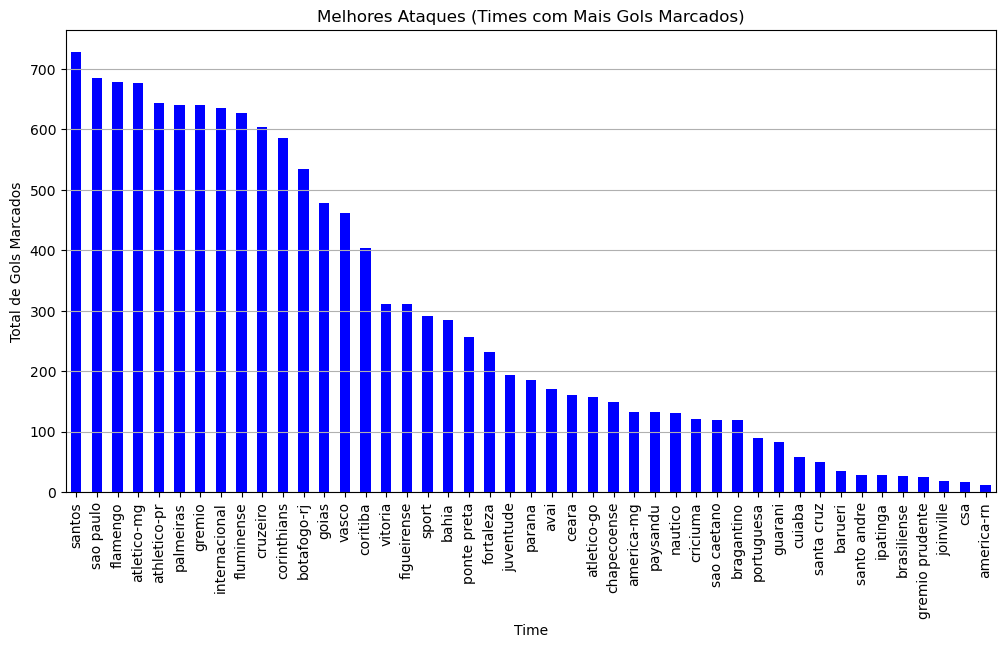

In [48]:
melhores_ataques = df_partidas.groupby('mandante')['mandante_Placar'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
melhores_ataques.plot(kind='bar', color='blue')
plt.title('Melhores Ataques (Times com Mais Gols Marcados)')
plt.xlabel('Time')
plt.ylabel('Total de Gols Marcados')
plt.grid(axis='y')
plt.show()

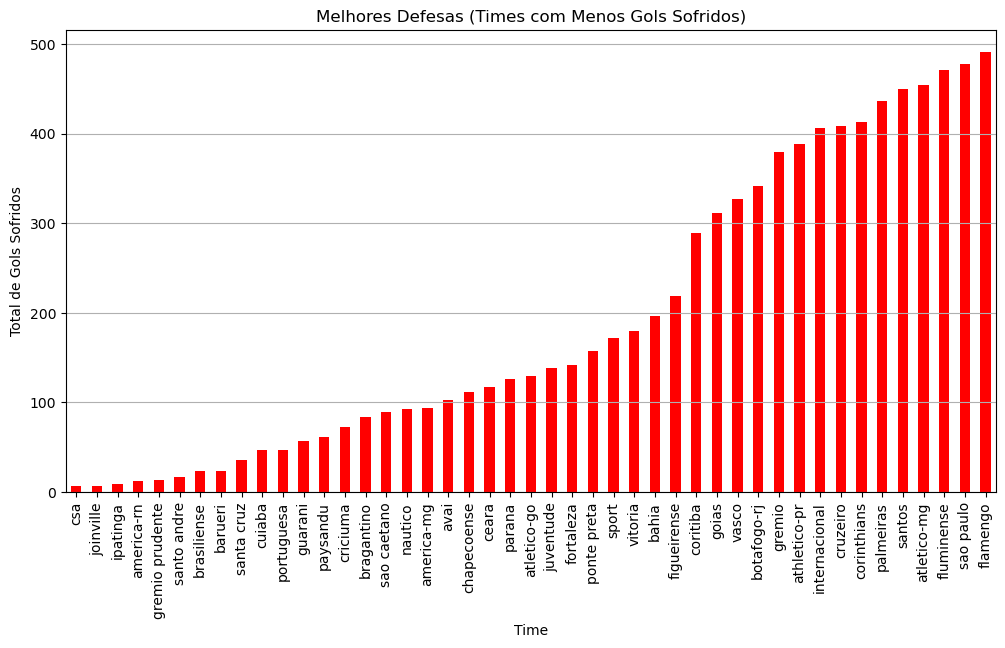

In [50]:
melhores_defesas = df_partidas.groupby('visitante')['visitante_Placar'].sum().sort_values()
plt.figure(figsize=(12, 6))
melhores_defesas.plot(kind='bar', color='red')
plt.title('Melhores Defesas (Times com Menos Gols Sofridos)')
plt.xlabel('Time')
plt.ylabel('Total de Gols Sofridos')
plt.grid(axis='y')
plt.show()

#### <a id="jogadores"></a>**Jogadores**

#### <a id="top-10-jogadores-que-mais-fizeram-gols"></a>**Top 10 Jogadores que Mais Fizeram Gols**

<Figure size 1200x600 with 0 Axes>

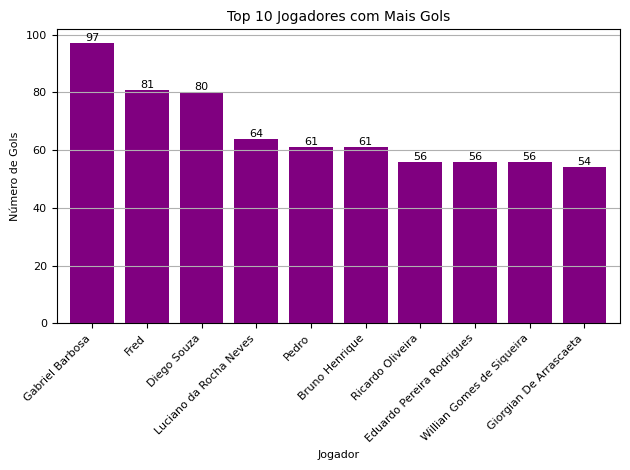

In [54]:
# Agrupar os dados por jogador e contar o número de gols
top_jogadores = df_gols.groupby('atleta').size().reset_index(name='gols')

# Ordenar os jogadores por número de gols em ordem decrescente
top_jogadores = top_jogadores.sort_values(by='gols', ascending=False).head(10)

# Plotar o gráfico dos top 10 jogadores com mais gols
plt.figure(figsize=(12, 6))
ax = top_jogadores.plot(kind='bar', x='atleta', y='gols', legend=False, color='purple', width=0.8)
plt.title('Top 10 Jogadores com Mais Gols', fontsize=10)  # Ajustar a fonte do título
plt.xlabel('Jogador', fontsize=8)  # Ajustar a fonte do rótulo do eixo x
plt.ylabel('Número de Gols', fontsize=8)  # Ajustar a fonte do rótulo do eixo y
plt.xticks(rotation=45, fontsize=8, ha='right')  # Ajustar a rotação e o tamanho da fonte dos rótulos do eixo x
plt.yticks(fontsize=8)  # Ajustar o tamanho da fonte dos rótulos do eixo y
plt.grid(axis='y')

# Adicionar rótulos de dados com tamanho de fonte ajustado
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8)

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

#### <a id="top-10-jogadores-que-mais-fizeram-infracoes"></a>**Top 10 jogadores que mais fizeram infrações**

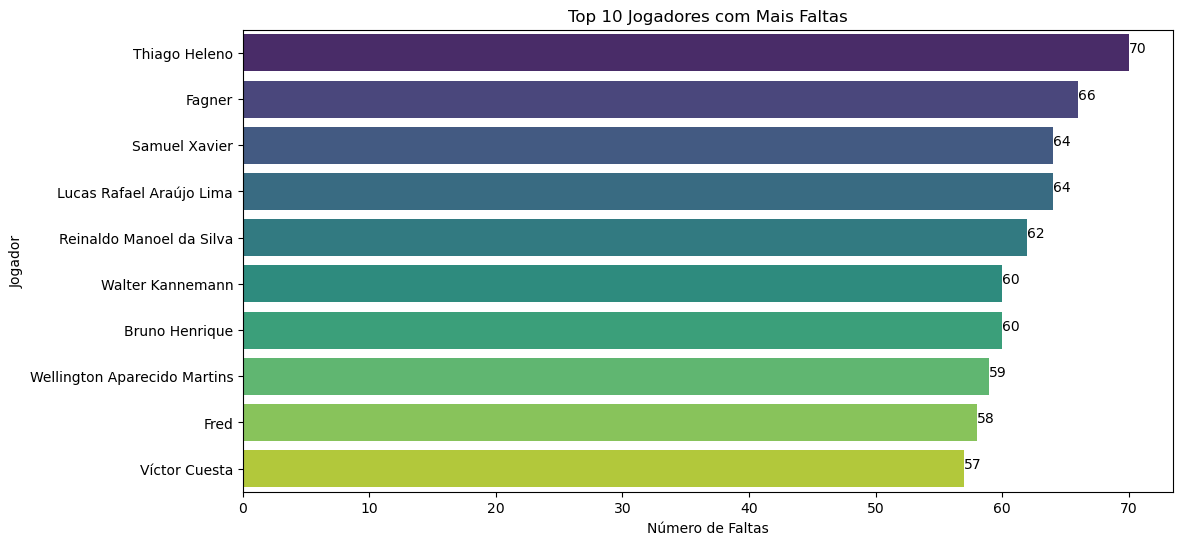

In [57]:
# Agrupar por jogador e contar as faltas (cartões amarelos)
faltas_por_jogador = df_cartoes[df_cartoes['cartao'] == 'Amarelo'].groupby('atleta').size().reset_index(name='faltas')

# Ordenar por número de faltas em ordem decrescente e selecionar os top 10
top_10_faltosos = faltas_por_jogador.sort_values(by='faltas', ascending=False).head(10)

# Configurar o estilo do gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='faltas', y='atleta', hue='atleta', data=top_10_faltosos, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Jogadores com Mais Faltas')
plt.xlabel('Número de Faltas')
plt.ylabel('Jogador')

# Adicionar rótulos de dados
for index, value in enumerate(top_10_faltosos['faltas']):
    plt.text(value, index, str(value))

plt.show()

#### <a id="cartoes"></a>**Cartões**

#### <a id="numero-de-cartoes-amarelos-por-temporada"></a>**Número de Cartões Amarelos por Temporada**

<Figure size 1200x600 with 0 Axes>

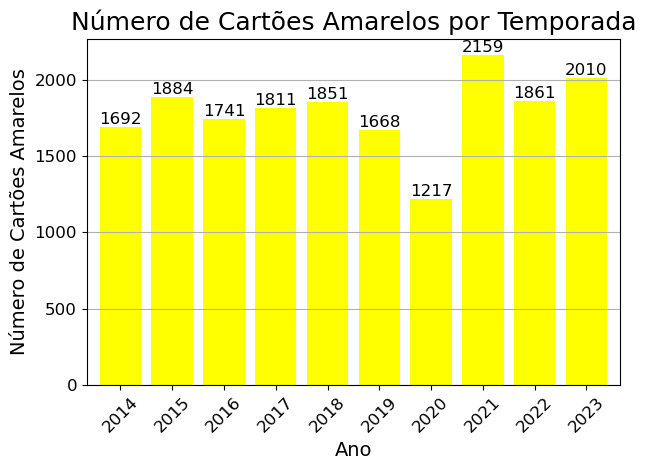

In [61]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Adicionar a coluna 'ano' ao dataframe de cartões
df_cartoes = df_cartoes.merge(df_partidas[['ID', 'ano']], left_on='partida_id', right_on='ID', how='left')

# Filtrar apenas os cartões amarelos
cartoes_amarelos = df_cartoes[df_cartoes['cartao'] == 'Amarelo']

# Contar o número de cartões amarelos por temporada
cartoes_amarelos_por_temporada = cartoes_amarelos.groupby('ano').size().reset_index(name='cartoes')

# Plotar o gráfico de número de cartões amarelos por temporada
plt.figure(figsize=(12, 6))
ax = cartoes_amarelos_por_temporada.plot(kind='bar', x='ano', y='cartoes', legend=False, color='yellow', width=0.8)
plt.title('Número de Cartões Amarelos por Temporada', fontsize=18)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Cartões Amarelos', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

# Adicionar rótulos de dados com tamanho de fonte ajustado
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

#### <a id="numero-de-cartoes-vermelhos-por-temporada"></a>**Número de Cartões Vermelhos por Temporada**

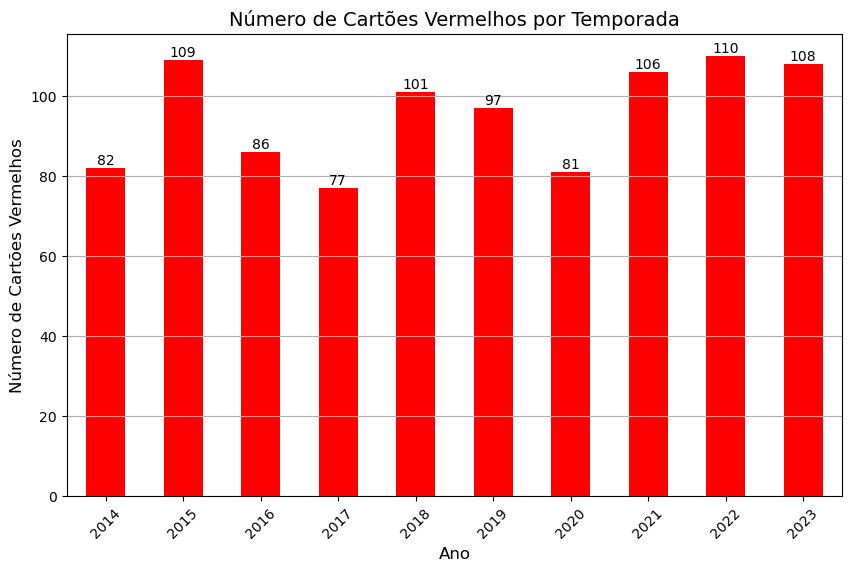

In [64]:
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y', dayfirst=True)

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Selecionar apenas as colunas necessárias de df_partidas
df_partidas_selecionadas = df_partidas[['ID', 'ano']]

# Renomear a coluna 'ID' para 'partida_id' para evitar conflitos durante o merge
df_partidas_selecionadas = df_partidas_selecionadas.rename(columns={'ID': 'partida_id', 'ano': 'ano_partida'})

# Merge dos dados de cartões com os dados de partidas para obter o ano
df_cartoes = df_cartoes.merge(df_partidas_selecionadas, on='partida_id', how='left')

# Filtrar apenas os cartões vermelhos
cartoes_vermelhos = df_cartoes[df_cartoes['cartao'] == 'Vermelho']

# Contar o número de cartões vermelhos por temporada
cartoes_vermelhos_por_temporada = cartoes_vermelhos.groupby('ano_partida').size()

# Plotar o gráfico de barras com rótulos de dados
plt.figure(figsize=(10, 6))
ax = cartoes_vermelhos_por_temporada.plot(kind='bar', color='red')
plt.title('Número de Cartões Vermelhos por Temporada', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Cartões Vermelhos', fontsize=12)
plt.grid(axis='y')

# Adicionar rótulos de dados
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.xticks(rotation=45)
plt.show()

#### <a id="top-10-times-mais-indisciplinados"></a>**Top 10 Times Mais Indisciplinados**

<Figure size 1200x600 with 0 Axes>

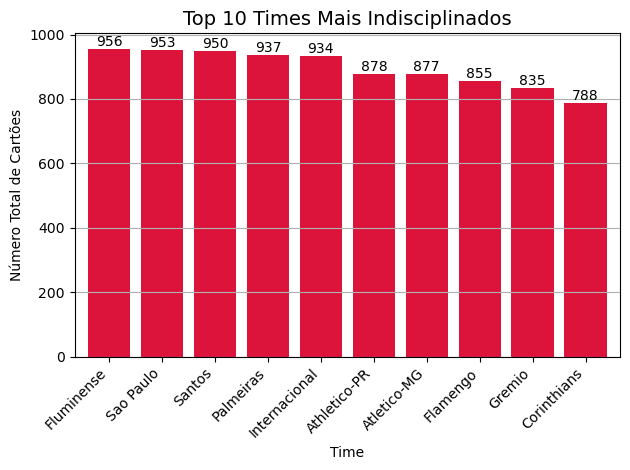

In [67]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Adicionar a coluna 'ano' ao dataframe de cartões
df_cartoes = df_cartoes.merge(df_partidas[['ID', 'ano']], left_on='partida_id', right_on='ID', how='left', suffixes=('', '_partidas'))

# Contar o número total de cartões (amarelos e vermelhos) por time
cartoes_por_time = df_cartoes.groupby('clube').size().reset_index(name='total_cartoes')

# Ordenar os times pelo número total de cartões em ordem decrescente
cartoes_por_time = cartoes_por_time.sort_values(by='total_cartoes', ascending=False)

# Plotar o gráfico dos times mais indisciplinados
plt.figure(figsize=(12, 6))
ax = cartoes_por_time.head(10).plot(kind='bar', x='clube', y='total_cartoes', legend=False, color='crimson', width=0.8)
plt.title('Top 10 Times Mais Indisciplinados', fontsize=14)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Número Total de Cartões', fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)
plt.grid(axis='y')

# Adicionar rótulos de dados com tamanho de fonte ajustado
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

#### <a id="jogadores-mais-penalizados"></a>**Jogadores Mais Penalizados**

<Figure size 1200x600 with 0 Axes>

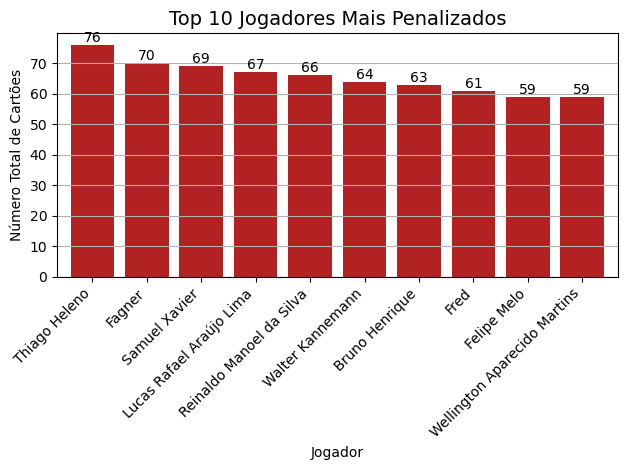

In [70]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Adicionar a coluna 'ano' ao dataframe de cartões
df_cartoes = df_cartoes.merge(df_partidas[['ID', 'ano']], left_on='partida_id', right_on='ID', how='left', suffixes=('', '_partidas'))

# Contar o número total de cartões por jogador
cartoes_por_jogador = df_cartoes.groupby('atleta').size().reset_index(name='total_cartoes')

# Ordenar os jogadores pelo número total de cartões em ordem decrescente
cartoes_por_jogador = cartoes_por_jogador.sort_values(by='total_cartoes', ascending=False)

# Plotar o gráfico dos jogadores mais penalizados
plt.figure(figsize=(12, 6))
ax = cartoes_por_jogador.head(10).plot(kind='bar', x='atleta', y='total_cartoes', legend=False, color='firebrick', width=0.8)
plt.title('Top 10 Jogadores Mais Penalizados', fontsize=14)
plt.xlabel('Jogador', fontsize=10)
plt.ylabel('Número Total de Cartões', fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)
plt.grid(axis='y')

# Adicionar rótulos de dados com tamanho de fonte ajustado
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

## <a id="analises-temporais"></a>3. **Análises Temporais**

#### <a id="numero-total-de-gols-por-temporada-ao-longo-dos-anos"></a>**Número Total de Gols por Temporada ao Longo dos Anos**

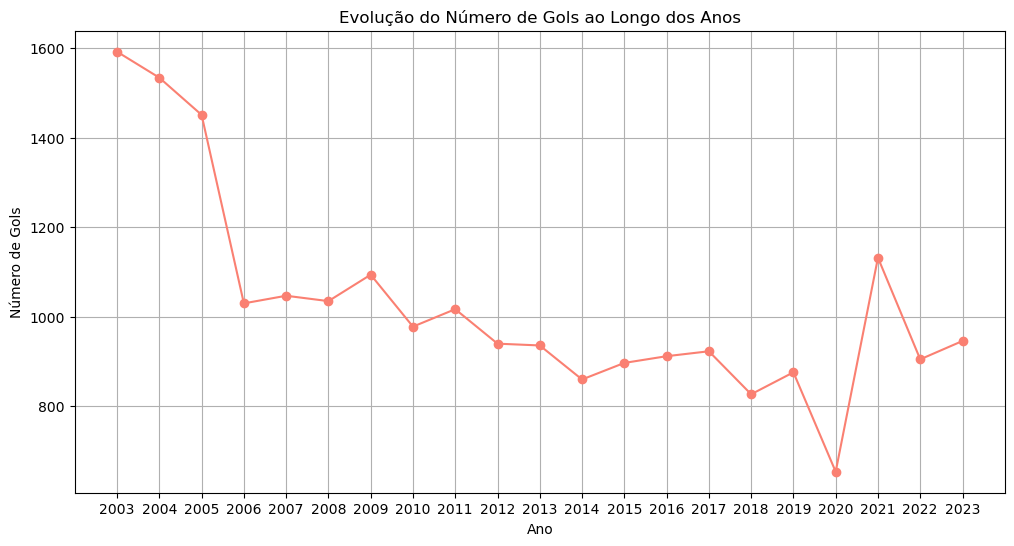

In [74]:
# Calcular o número de gols por temporada
gols_por_temporada = df_partidas.groupby('ano')[['mandante_Placar', 'visitante_Placar']].sum()
gols_por_temporada['total_gols'] = gols_por_temporada['mandante_Placar'] + gols_por_temporada['visitante_Placar']

# Plotar a evolução do número de gols ao longo dos anos
plt.figure(figsize=(12, 6))
ax = gols_por_temporada['total_gols'].plot(kind='line', marker='o', color='salmon')
plt.title('Evolução do Número de Gols ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Gols')
plt.grid()
plt.xticks(range(2003, 2024))  # Define os rótulos do eixo x de 2003 a 2023
plt.show()

#### <a id="comportamento-de-gols-marcados-por-mandantes-e-visitantes"></a>**Comportamento de Gols Marcados por Mandantes e Visitantes**

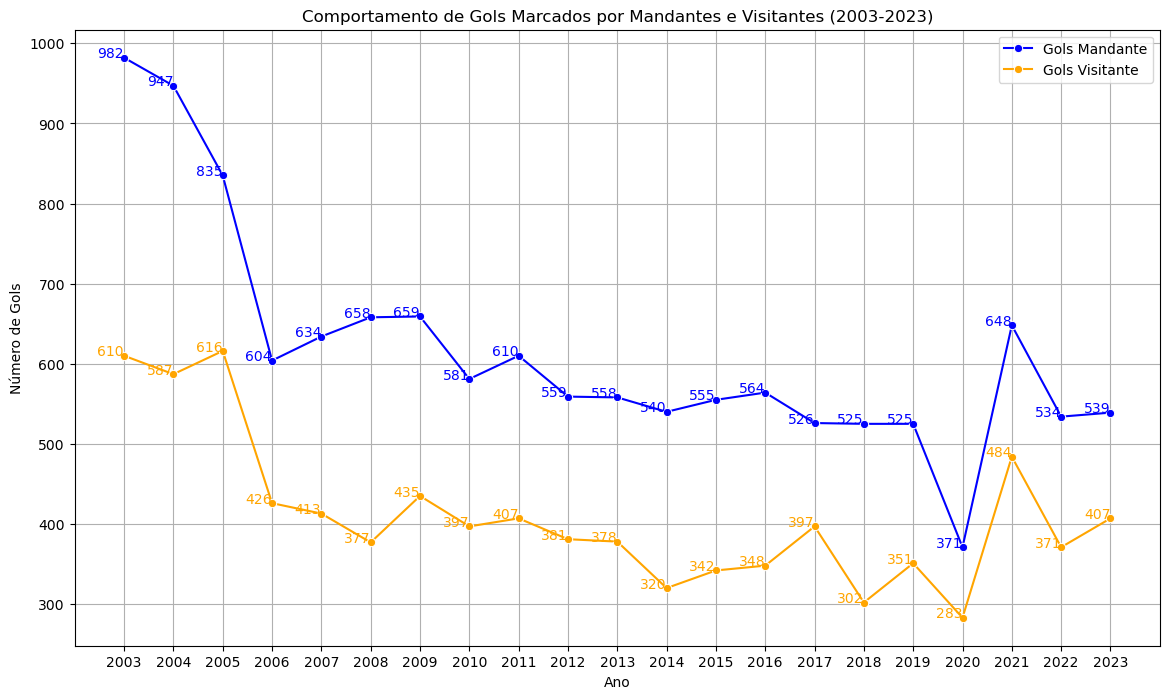

In [77]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Agrupar por ano e calcular a soma dos gols marcados pelos mandantes e visitantes
gols_mandante = df_partidas.groupby('ano')['mandante_Placar'].sum().reset_index(name='gols_mandante')
gols_visitante = df_partidas.groupby('ano')['visitante_Placar'].sum().reset_index(name='gols_visitante')

# Unir os dados de gols marcados pelos mandantes e visitantes
gols_totais = pd.merge(gols_mandante, gols_visitante, on='ano')

# Plotar os dados
plt.figure(figsize=(14, 8))
sns.lineplot(data=gols_totais, x='ano', y='gols_mandante', label='Gols Mandante', marker='o', color='blue')
sns.lineplot(data=gols_totais, x='ano', y='gols_visitante', label='Gols Visitante', marker='o', color='orange')

plt.title('Comportamento de Gols Marcados por Mandantes e Visitantes (2003-2023)')
plt.xlabel('Ano')
plt.ylabel('Número de Gols')
plt.grid()
plt.xticks(range(2003, 2024))
plt.legend()

# Adicionar rótulos de dados
for i in range(len(gols_totais)):
    plt.text(gols_totais['ano'][i], gols_totais['gols_mandante'][i], gols_totais['gols_mandante'][i], ha='right', fontsize=10, color='blue')
    plt.text(gols_totais['ano'][i], gols_totais['gols_visitante'][i], gols_totais['gols_visitante'][i], ha='right', fontsize=10, color='orange')

plt.show()

#### <a id="vitorias-por-visitante-e-mandante-por-temporada"></a>**Vitórias por Visitante e Mandante por Temporada**

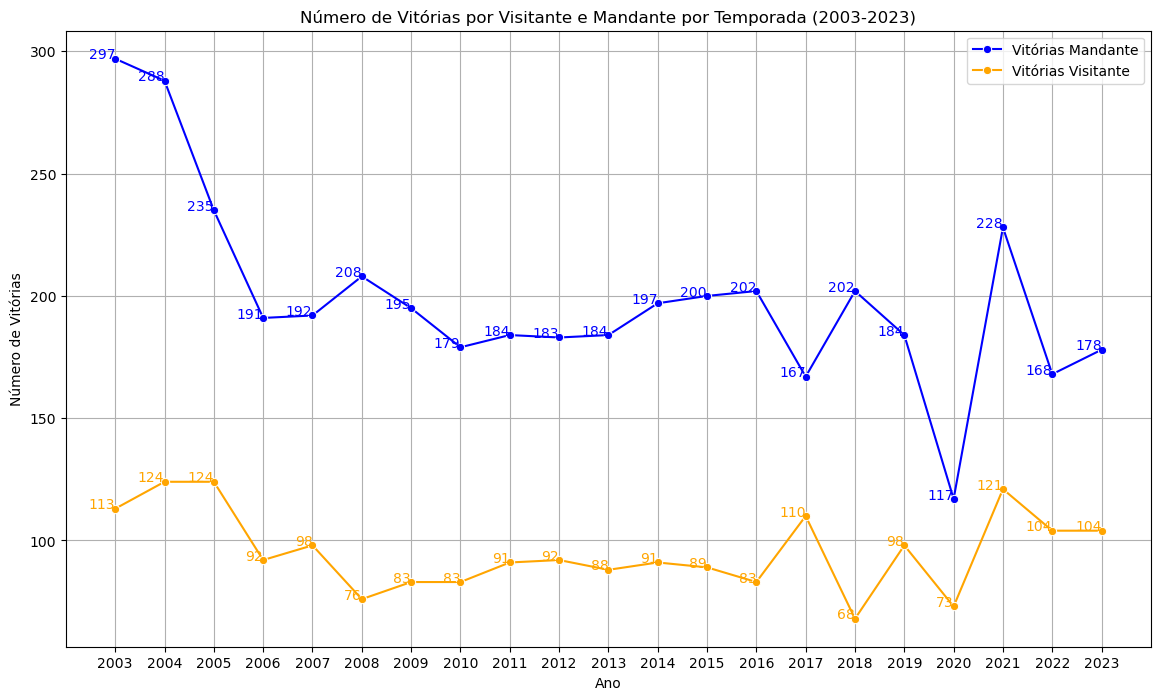

In [80]:
df_partidas['ano'] = df_partidas['data'].dt.year

# Calcular vitórias como mandante e visitante
df_partidas['vitoria_mandante'] = df_partidas['mandante_Placar'] > df_partidas['visitante_Placar']
df_partidas['vitoria_visitante'] = df_partidas['visitante_Placar'] > df_partidas['mandante_Placar']

# Agrupar por ano e calcular o número de vitórias de mandantes e visitantes
vitorias_mandante = df_partidas.groupby('ano')['vitoria_mandante'].sum().reset_index(name='vitorias_mandante')
vitorias_visitante = df_partidas.groupby('ano')['vitoria_visitante'].sum().reset_index(name='vitorias_visitante')

# Unir os dados de vitórias de mandantes e visitantes
vitorias_totais = pd.merge(vitorias_mandante, vitorias_visitante, on='ano')

# Plotar os dados
plt.figure(figsize=(14, 8))
sns.lineplot(data=vitorias_totais, x='ano', y='vitorias_mandante', label='Vitórias Mandante', marker='o', color='blue')
sns.lineplot(data=vitorias_totais, x='ano', y='vitorias_visitante', label='Vitórias Visitante', marker='o', color='orange')

plt.title('Número de Vitórias por Visitante e Mandante por Temporada (2003-2023)')
plt.xlabel('Ano')
plt.ylabel('Número de Vitórias')
plt.grid()
plt.xticks(range(2003, 2024))
plt.legend()

# Adicionar rótulos de dados
for i in range(len(vitorias_totais)):
    plt.text(vitorias_totais['ano'][i], vitorias_totais['vitorias_mandante'][i], vitorias_totais['vitorias_mandante'][i], ha='right', fontsize=10, color='blue')
    plt.text(vitorias_totais['ano'][i], vitorias_totais['vitorias_visitante'][i], vitorias_totais['vitorias_visitante'][i], ha='right', fontsize=10, color='orange')

plt.show()

#### <a id="mudancas-no-desempenho-dos-times-ao-longo-das-temporadas"></a>**Mudanças no Desempenho dos Times ao Longo das Temporadas**

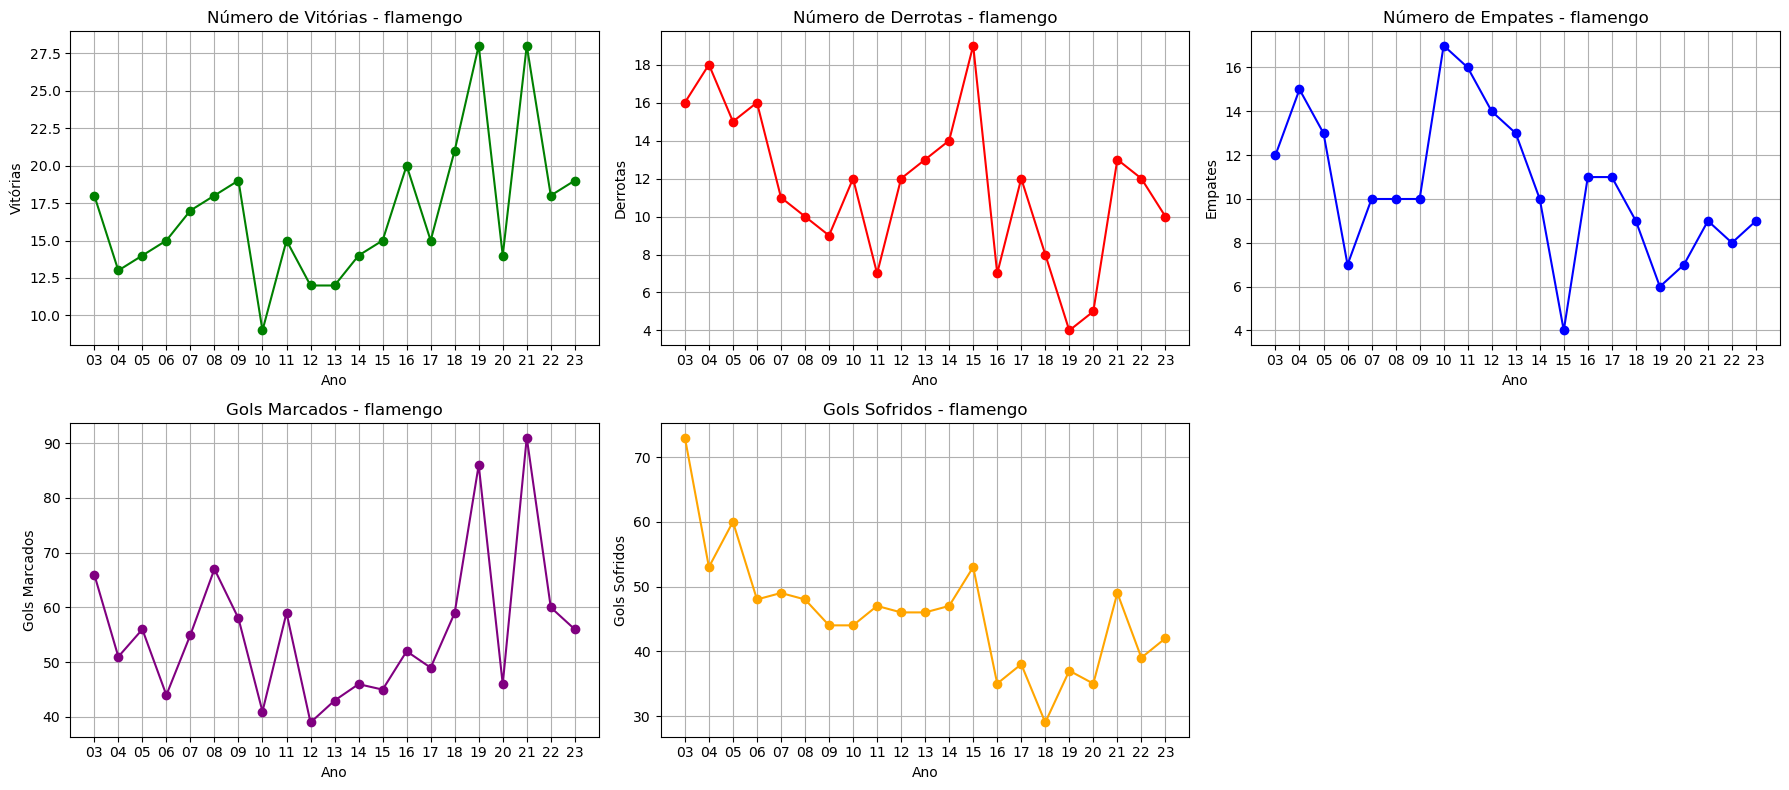

In [83]:
# Para esse exemplo, iremos analisar apenas o desempenho de um time (Flamengo)

# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Função para calcular desempenho dos times
def calcular_desempenho(df):
    df['vitoria_mandante'] = df['mandante_Placar'] > df['visitante_Placar']
    df['vitoria_visitante'] = df['visitante_Placar'] > df['mandante_Placar']
    df['empate'] = df['mandante_Placar'] == df['visitante_Placar']
    
    desempenho_mandante = df.groupby(['ano', 'mandante']).agg(
        vitorias=('vitoria_mandante', 'sum'),
        derrotas=('vitoria_visitante', 'sum'),
        empates=('empate', 'sum'),
        gols_marcados=('mandante_Placar', 'sum'),
        gols_sofridos=('visitante_Placar', 'sum')
    ).reset_index()
    
    desempenho_visitante = df.groupby(['ano', 'visitante']).agg(
        vitorias=('vitoria_visitante', 'sum'),
        derrotas=('vitoria_mandante', 'sum'),
        empates=('empate', 'sum'),
        gols_marcados=('visitante_Placar', 'sum'),
        gols_sofridos=('mandante_Placar', 'sum')
    ).reset_index()
    
    desempenho_visitante.rename(columns={'visitante': 'time'}, inplace=True)
    desempenho_mandante.rename(columns={'mandante': 'time'}, inplace=True)
    
    desempenho_total = pd.concat([desempenho_mandante, desempenho_visitante], axis=0)
    desempenho_total = desempenho_total.groupby(['ano', 'time']).sum().reset_index()
    
    return desempenho_total

# Calcular o desempenho dos times
desempenho_times = calcular_desempenho(df_partidas)

# Salvar os dados de desempenho para evitar recálculo
desempenho_times.to_csv(r'C:\Users\USER\Desktop\Particular\Futebol\desempenho_times.csv', index=False)

# Selecionar um time específico para análise, por exemplo, 'Flamengo'
time_especifico = 'flamengo'
desempenho_time_especifico = desempenho_times[desempenho_times['time'].str.lower() == time_especifico.lower()]

# Função para abreviar os anos
def abreviar_anos(anos):
    return [str(ano)[-2:] for ano in anos]

# Plotar as mudanças no desempenho ao longo das temporadas
plt.figure(figsize=(18, 8))

# Número de vitórias
plt.subplot(2, 3, 1)
plt.plot(desempenho_time_especifico['ano'], desempenho_time_especifico['vitorias'], marker='o', color='green')
plt.title(f'Número de Vitórias - {time_especifico}')
plt.xlabel('Ano')
plt.ylabel('Vitórias')
plt.grid(True)
plt.xticks(desempenho_time_especifico['ano'], abreviar_anos(desempenho_time_especifico['ano']))

# Número de derrotas
plt.subplot(2, 3, 2)
plt.plot(desempenho_time_especifico['ano'], desempenho_time_especifico['derrotas'], marker='o', color='red')
plt.title(f'Número de Derrotas - {time_especifico}')
plt.xlabel('Ano')
plt.ylabel('Derrotas')
plt.grid(True)
plt.xticks(desempenho_time_especifico['ano'], abreviar_anos(desempenho_time_especifico['ano']))

# Número de empates
plt.subplot(2, 3, 3)
plt.plot(desempenho_time_especifico['ano'], desempenho_time_especifico['empates'], marker='o', color='blue')
plt.title(f'Número de Empates - {time_especifico}')
plt.xlabel('Ano')
plt.ylabel('Empates')
plt.grid(True)
plt.xticks(desempenho_time_especifico['ano'], abreviar_anos(desempenho_time_especifico['ano']))

# Gols marcados
plt.subplot(2, 3, 4)
plt.plot(desempenho_time_especifico['ano'], desempenho_time_especifico['gols_marcados'], marker='o', color='purple')
plt.title(f'Gols Marcados - {time_especifico}')
plt.xlabel('Ano')
plt.ylabel('Gols Marcados')
plt.grid(True)
plt.xticks(desempenho_time_especifico['ano'], abreviar_anos(desempenho_time_especifico['ano']))

# Gols sofridos
plt.subplot(2, 3, 5)
plt.plot(desempenho_time_especifico['ano'], desempenho_time_especifico['gols_sofridos'], marker='o', color='orange')
plt.title(f'Gols Sofridos - {time_especifico}')
plt.xlabel('Ano')
plt.ylabel('Gols Sofridos')
plt.grid(True)
plt.xticks(desempenho_time_especifico['ano'], abreviar_anos(desempenho_time_especifico['ano']))

plt.tight_layout()
plt.show()

#### <a id="evolucao-do-numero-de-cartoes-ao-longo-dos-anos"></a>**Evolução do Número de Cartões ao Longo dos Anos**

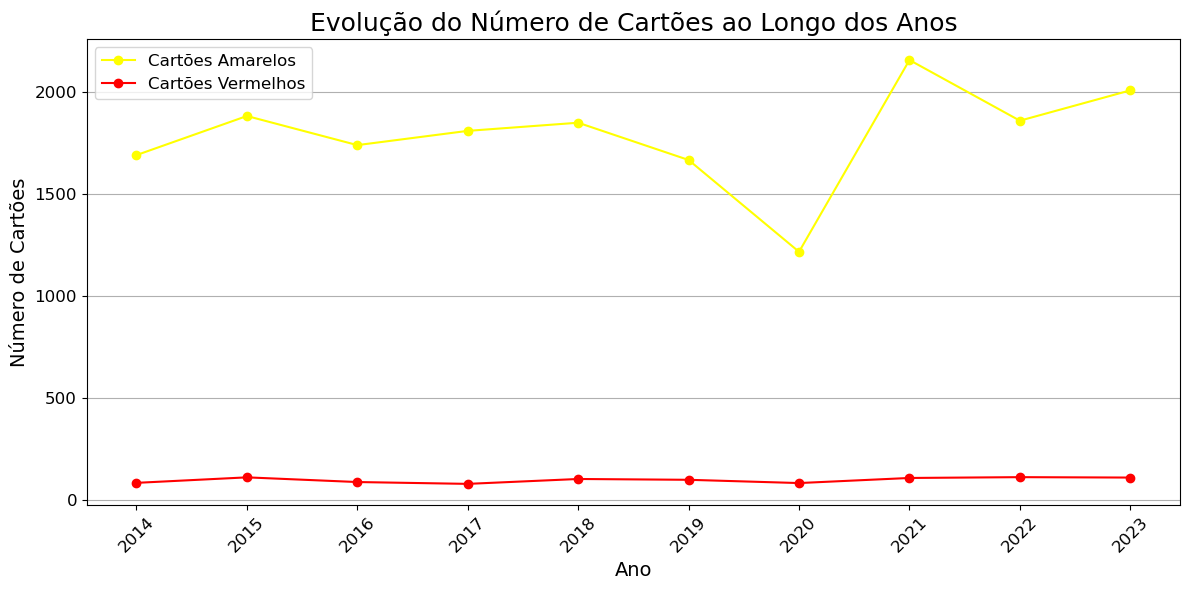

In [86]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Adicionar a coluna 'ano' ao dataframe de cartões
df_cartoes = df_cartoes.merge(df_partidas[['ID', 'ano']], left_on='partida_id', right_on='ID', how='left', suffixes=('', '_partidas'))

# Contar o número de cartões amarelos por ano
cartoes_amarelos_por_ano = df_cartoes[df_cartoes['cartao'] == 'Amarelo'].groupby('ano').size().reset_index(name='cartoes_amarelos')

# Contar o número de cartões vermelhos por ano
cartoes_vermelhos_por_ano = df_cartoes[df_cartoes['cartao'] == 'Vermelho'].groupby('ano').size().reset_index(name='cartoes_vermelhos')

# Mesclar os dados de cartões amarelos e vermelhos por ano
cartoes_por_ano = pd.merge(cartoes_amarelos_por_ano, cartoes_vermelhos_por_ano, on='ano', how='outer').fillna(0)

# Plotar o gráfico de evolução do número de cartões ao longo dos anos
plt.figure(figsize=(12, 6))
plt.plot(cartoes_por_ano['ano'], cartoes_por_ano['cartoes_amarelos'], label='Cartões Amarelos', color='yellow', marker='o')
plt.plot(cartoes_por_ano['ano'], cartoes_por_ano['cartoes_vermelhos'], label='Cartões Vermelhos', color='red', marker='o')
plt.title('Evolução do Número de Cartões ao Longo dos Anos', fontsize=18)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Cartões', fontsize=14)
plt.xticks(cartoes_por_ano['ano'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y')
plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

## <a id="analise-de-desempenho"></a>4. **Análise de Desempenho**

#### <a id="times-desempenho"></a>**Times**

#### <a id="analise-aproveitamento-como-mandante"></a>**Análise Aproveitamento como Mandante**

<Figure size 1400x800 with 0 Axes>

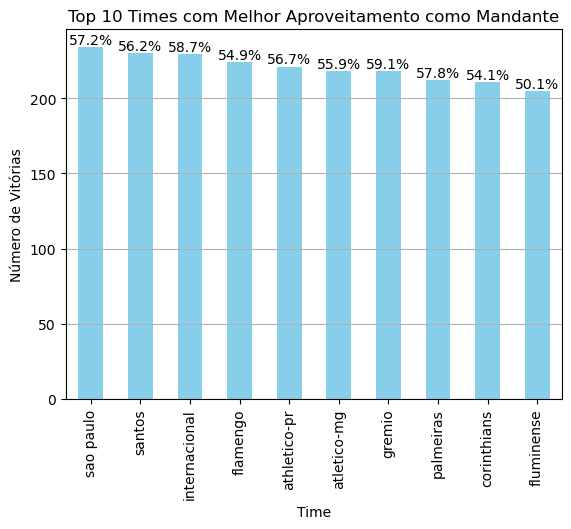

In [91]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Calcular vitórias como mandante
df_partidas['vitoria_mandante'] = df_partidas['mandante_Placar'] > df_partidas['visitante_Placar']

# Agrupar por mandante e contar as vitórias e o total de jogos em casa
vitorias_mandante = df_partidas.groupby('mandante').agg(
    total_vitorias=('vitoria_mandante', 'sum'),
    total_jogos=('vitoria_mandante', 'size')
).reset_index()

# Calcular o percentual de vitórias em casa
vitorias_mandante['percentual_vitorias'] = (vitorias_mandante['total_vitorias'] / vitorias_mandante['total_jogos']) * 100

# Ordenar pelo número de vitórias
vitorias_mandante = vitorias_mandante.sort_values(by='total_vitorias', ascending=False).head(10)

# Visualizar os resultados
plt.figure(figsize=(14, 8))
ax = vitorias_mandante.plot(kind='bar', x='mandante', y='total_vitorias', legend=False, color='skyblue')
plt.title('Top 10 Times com Melhor Aproveitamento como Mandante')
plt.xlabel('Time')
plt.ylabel('Número de Vitórias')
plt.grid(axis='y')

# Adicionar os percentuais aos rótulos de dados (apenas percentuais)
for i in ax.containers:
    ax.bar_label(i, labels=[f'{p:.1f}%' for p in vitorias_mandante['percentual_vitorias']], label_type='edge', fontsize=10)

plt.show()

#### <a id="analise-aproveitamento-como-visitante"></a>**Análise Aproveitamento como Visitante**

<Figure size 1400x800 with 0 Axes>

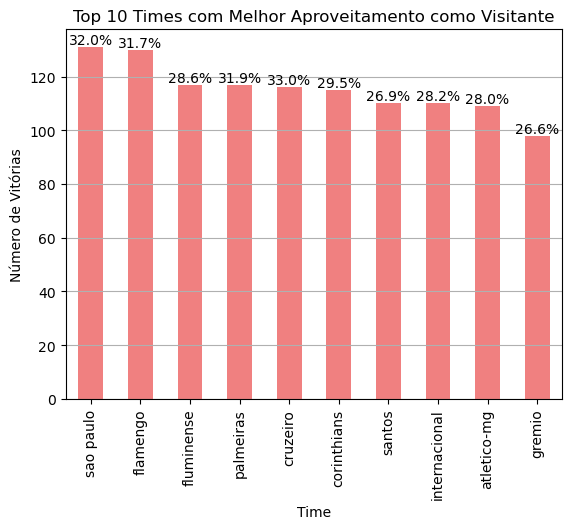

In [94]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Calcular vitórias como visitante
df_partidas['vitoria_visitante'] = df_partidas['visitante_Placar'] > df_partidas['mandante_Placar']

# Agrupar por visitante e contar as vitórias e o total de jogos fora de casa
vitorias_visitante = df_partidas.groupby('visitante').agg(
    total_vitorias=('vitoria_visitante', 'sum'),
    total_jogos=('vitoria_visitante', 'size')
).reset_index()

# Calcular o percentual de vitórias fora de casa
vitorias_visitante['percentual_vitorias'] = (vitorias_visitante['total_vitorias'] / vitorias_visitante['total_jogos']) * 100

# Ordenar pelo número de vitórias
vitorias_visitante = vitorias_visitante.sort_values(by='total_vitorias', ascending=False).head(10)

# Visualizar os resultados
plt.figure(figsize=(14, 8))
ax = vitorias_visitante.plot(kind='bar', x='visitante', y='total_vitorias', legend=False, color='lightcoral')
plt.title('Top 10 Times com Melhor Aproveitamento como Visitante')
plt.xlabel('Time')
plt.ylabel('Número de Vitórias')
plt.grid(axis='y')

# Adicionar os percentuais aos rótulos de dados (apenas percentuais)
for i in ax.containers:
    ax.bar_label(i, labels=[f'{p:.1f}%' for p in vitorias_visitante['percentual_vitorias']], label_type='edge', fontsize=10)

plt.show()

#### <a id="times-com-maior-numero-de-empate"></a>**Times com Maior Número de Empates**

<Figure size 1400x800 with 0 Axes>

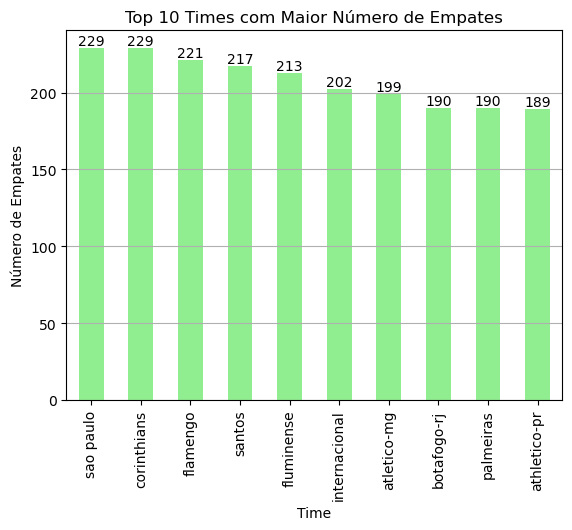

In [97]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Calcular empates
df_partidas['empate'] = df_partidas['mandante_Placar'] == df_partidas['visitante_Placar']

# Agrupar por mandante e visitante para contar o total de empates
empates_mandante = df_partidas.groupby('mandante').agg(
    total_empates_mandante=('empate', 'sum')
).reset_index()

empates_visitante = df_partidas.groupby('visitante').agg(
    total_empates_visitante=('empate', 'sum')
).reset_index()

# Renomear as colunas para facilitar o merge
empates_mandante.rename(columns={'mandante': 'time'}, inplace=True)
empates_visitante.rename(columns={'visitante': 'time'}, inplace=True)

# Combinar os empates como mandante e visitante
total_empates = empates_mandante.merge(empates_visitante, on='time', how='outer').fillna(0)
total_empates['total_empates'] = total_empates['total_empates_mandante'] + total_empates['total_empates_visitante']

# Ordenar pelo número total de empates
total_empates = total_empates.sort_values(by='total_empates', ascending=False).head(10)

# Visualizar os resultados
plt.figure(figsize=(14, 8))
ax = total_empates.plot(kind='bar', x='time', y='total_empates', legend=False, color='lightgreen')
plt.title('Top 10 Times com Maior Número de Empates')
plt.xlabel('Time')
plt.ylabel('Número de Empates')
plt.grid(axis='y')

# Adicionar os rótulos de dados (apenas números)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

#### <a id="analise-de-media-de-gols-por-periodo-de-jogo"></a>**Análise de Média de Gols por Período de Jogo**

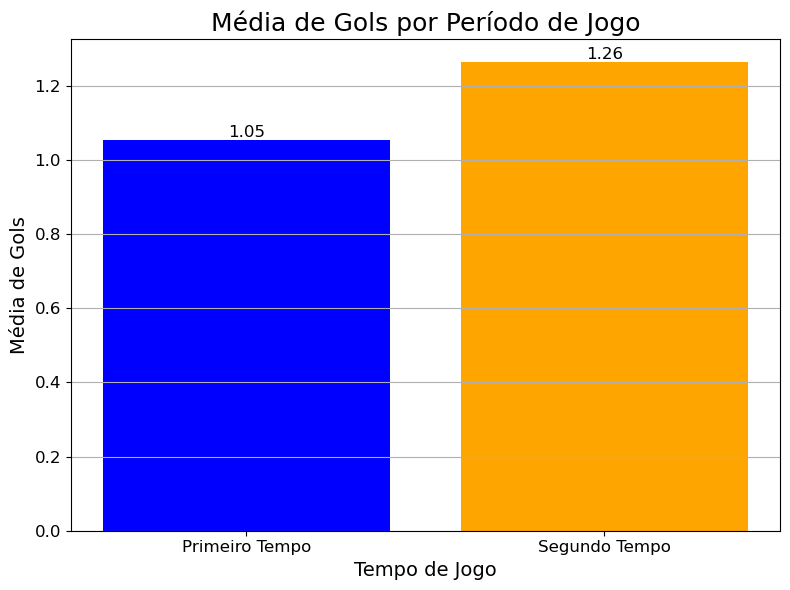

In [100]:
# Verificar os tipos de dados e converter a coluna 'minuto' para numérica, se necessário
df_gols['minuto'] = pd.to_numeric(df_gols['minuto'], errors='coerce')

# Dividir os gols entre primeiro tempo e segundo tempo
gols_primeiro_tempo = df_gols[df_gols['minuto'] <= 45]
gols_segundo_tempo = df_gols[df_gols['minuto'] > 45]

# Calcular a média de gols por tempo de jogo
media_gols_primeiro_tempo = gols_primeiro_tempo.shape[0] / df_gols['partida_id'].nunique()
media_gols_segundo_tempo = gols_segundo_tempo.shape[0] / df_gols['partida_id'].nunique()

# Preparar os dados para o gráfico
labels = ['Primeiro Tempo', 'Segundo Tempo']
valores = [media_gols_primeiro_tempo, media_gols_segundo_tempo]

# Plotar o gráfico de média de gols por tempo de jogo
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, valores, color=['blue', 'orange'])
plt.title('Média de Gols por Período de Jogo', fontsize=18)
plt.xlabel('Tempo de Jogo', fontsize=14)
plt.ylabel('Média de Gols', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

# Adicionar rótulos de dados com tamanho de fonte ajustado
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=12)

plt.grid(axis='y')
plt.tight_layout()  # Ajustar o layout para evitar sobreposição
plt.show()

#### <a id="probabilidade-de-vitoria-com-base-nos-gols-marcados-por-tempo"></a>**Probabilidade de Vitória com Base nos Gols Marcados por Tempo**

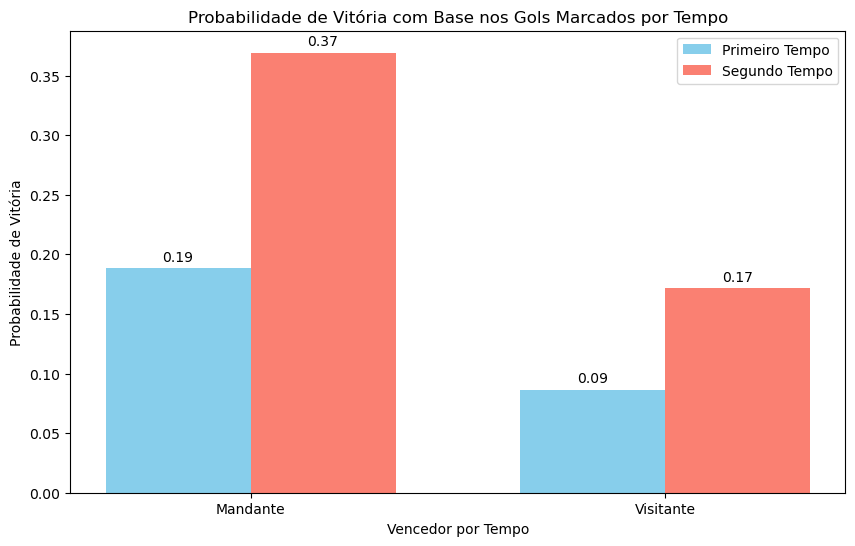

In [103]:
np.random.seed(42)  # Para reprodutibilidade
df_partidas['gols_primeiro_tempo_mandante'] = np.random.randint(0, 4, size=len(df_partidas))
df_partidas['gols_segundo_tempo_mandante'] = df_partidas['mandante_Placar'] - df_partidas['gols_primeiro_tempo_mandante']

df_partidas['gols_primeiro_tempo_visitante'] = np.random.randint(0, 4, size=len(df_partidas))
df_partidas['gols_segundo_tempo_visitante'] = df_partidas['visitante_Placar'] - df_partidas['gols_primeiro_tempo_visitante']

# Criar colunas para indicar a vitória do mandante e do visitante
df_partidas['vitoria_mandante'] = df_partidas['mandante_Placar'] > df_partidas['visitante_Placar']
df_partidas['vitoria_visitante'] = df_partidas['visitante_Placar'] > df_partidas['mandante_Placar']

# Verificar quem marcou mais gols no primeiro tempo e no segundo tempo
df_partidas['vencedor_primeiro_tempo'] = np.where(df_partidas['gols_primeiro_tempo_mandante'] > df_partidas['gols_primeiro_tempo_visitante'], 'Mandante', 
                                                   np.where(df_partidas['gols_primeiro_tempo_mandante'] < df_partidas['gols_primeiro_tempo_visitante'], 'Visitante', 'Empate'))

df_partidas['vencedor_segundo_tempo'] = np.where(df_partidas['gols_segundo_tempo_mandante'] > df_partidas['gols_segundo_tempo_visitante'], 'Mandante', 
                                                  np.where(df_partidas['gols_segundo_tempo_mandante'] < df_partidas['gols_segundo_tempo_visitante'], 'Visitante', 'Empate'))

# Analisar a relação entre o vencedor do jogo e os vencedores dos tempos
def calcular_probabilidades(df, coluna):
    total = len(df)
    vitorias_mandante = len(df[(df[coluna] == 'Mandante') & (df['vitoria_mandante'])])
    vitorias_visitante = len(df[(df[coluna] == 'Visitante') & (df['vitoria_visitante'])])
    prob_mandante = vitorias_mandante / total
    prob_visitante = vitorias_visitante / total
    return prob_mandante, prob_visitante

prob_primeiro_tempo = calcular_probabilidades(df_partidas, 'vencedor_primeiro_tempo')
prob_segundo_tempo = calcular_probabilidades(df_partidas, 'vencedor_segundo_tempo')

# Visualizar os resultados
labels = ['Mandante', 'Visitante']
probs_primeiro_tempo = [prob_primeiro_tempo[0], prob_primeiro_tempo[1]]
probs_segundo_tempo = [prob_segundo_tempo[0], prob_segundo_tempo[1]]

x = np.arange(len(labels))  # Posição dos rótulos
width = 0.35  # Largura das barras

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, probs_primeiro_tempo, width, label='Primeiro Tempo', color='skyblue')
bars2 = ax.bar(x + width/2, probs_segundo_tempo, width, label='Segundo Tempo', color='salmon')

# Adicionar rótulos, título e legendas
ax.set_xlabel('Vencedor por Tempo')
ax.set_ylabel('Probabilidade de Vitória')
ax.set_title('Probabilidade de Vitória com Base nos Gols Marcados por Tempo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adicionar rótulos de dados
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 pontos de deslocamento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
plt.savefig('probabilidade_vitoria_gols_tempo.png')

plt.show()

## <a id="analises-geograficas"></a>5. **Análises Geográficas**

#### <a id="desempenho-por-regioes"></a>**Desempenho por Regiões**

<Figure size 1400x800 with 0 Axes>

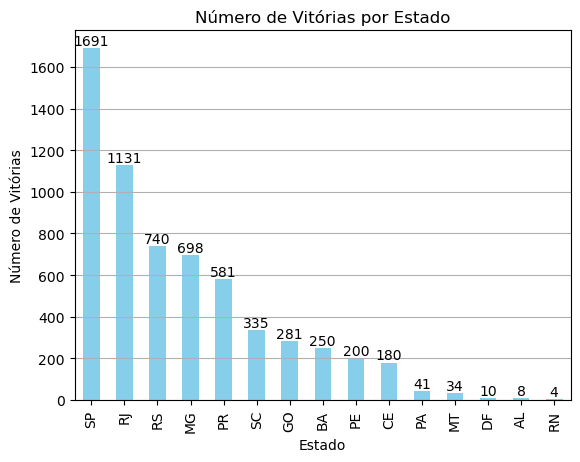

In [107]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Calcular vitórias como mandante e visitante
df_partidas['vitoria_mandante'] = df_partidas['mandante_Placar'] > df_partidas['visitante_Placar']
df_partidas['vitoria_visitante'] = df_partidas['visitante_Placar'] > df_partidas['mandante_Placar']

# Agrupar por estado do mandante e visitante para calcular o número de vitórias
vitorias_mandante = df_partidas.groupby('mandante_Estado').agg(
    vitorias_mandante=('vitoria_mandante', 'sum')
).reset_index()

vitorias_visitante = df_partidas.groupby('visitante_Estado').agg(
    vitorias_visitante=('vitoria_visitante', 'sum')
).reset_index()

# Renomear as colunas para facilitar o merge
vitorias_mandante.rename(columns={'mandante_Estado': 'estado'}, inplace=True)
vitorias_visitante.rename(columns={'visitante_Estado': 'estado'}, inplace=True)

# Combinar as vitórias como mandante e visitante
total_vitorias = pd.merge(vitorias_mandante, vitorias_visitante, on='estado', how='outer').fillna(0)
total_vitorias['total_vitorias'] = total_vitorias['vitorias_mandante'] + total_vitorias['vitorias_visitante']

# Ordenar pelo número total de vitórias
total_vitorias = total_vitorias.sort_values(by='total_vitorias', ascending=False)

# Visualizar os resultados
plt.figure(figsize=(14, 8))
ax = total_vitorias.plot(kind='bar', x='estado', y='total_vitorias', legend=False, color='skyblue')
plt.title('Número de Vitórias por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Vitórias')
plt.grid(axis='y')

# Adicionar os rótulos de dados (apenas números)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

#### <a id="comparacao-entre-times-de-diferentes-estados-regioes"></a>**Comparação entre Times de Diferentes Estados/Regiões**

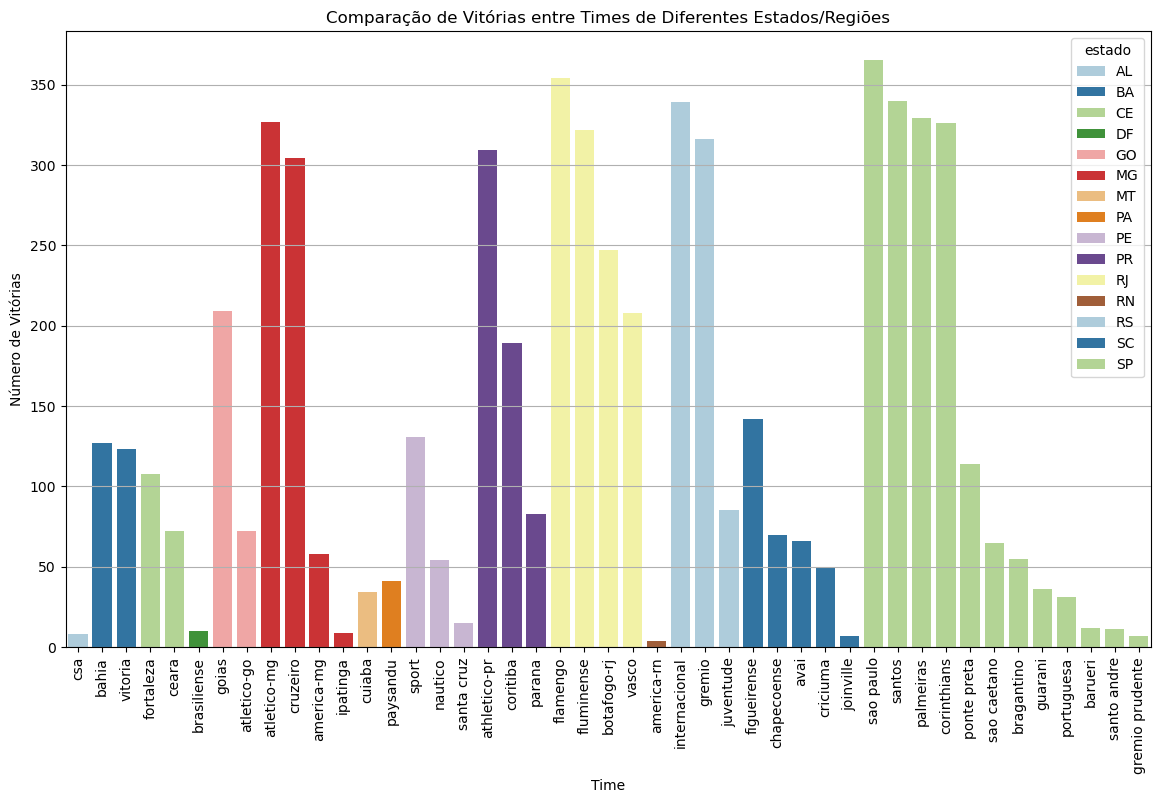

In [110]:
# Converter a coluna 'data' para datetime
df_partidas['data'] = pd.to_datetime(df_partidas['data'], format='%d/%m/%Y')

# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Calcular vitórias como mandante e visitante
df_partidas['vitoria_mandante'] = df_partidas['mandante_Placar'] > df_partidas['visitante_Placar']
df_partidas['vitoria_visitante'] = df_partidas['visitante_Placar'] > df_partidas['mandante_Placar']

# Agrupar por estado do mandante e visitante para calcular o número de vitórias
vitorias_mandante = df_partidas[df_partidas['vitoria_mandante']].groupby(['mandante_Estado', 'mandante']).size().reset_index(name='vitorias')
vitorias_visitante = df_partidas[df_partidas['vitoria_visitante']].groupby(['visitante_Estado', 'visitante']).size().reset_index(name='vitorias')

# Renomear as colunas para facilitar o merge
vitorias_mandante.rename(columns={'mandante_Estado': 'estado', 'mandante': 'time'}, inplace=True)
vitorias_visitante.rename(columns={'visitante_Estado': 'estado', 'visitante': 'time'}, inplace=True)

# Combinar as vitórias como mandante e visitante
total_vitorias = pd.concat([vitorias_mandante, vitorias_visitante]).groupby(['estado', 'time']).sum().reset_index()

# Ordenar pelo número total de vitórias
total_vitorias = total_vitorias.sort_values(by=['estado', 'vitorias'], ascending=[True, False])

# Visualizar os resultados
plt.figure(figsize=(14, 8))
sns.barplot(x='time', y='vitorias', hue='estado', data=total_vitorias, dodge=False, palette='Paired')

plt.title('Comparação de Vitórias entre Times de Diferentes Estados/Regiões')
plt.xlabel('Time')
plt.ylabel('Número de Vitórias')
plt.grid(axis='y')

# Rotacionar rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)
plt.savefig('comparacao_vitorias_entre_estados.png')

plt.show()

## <a id="analises-avancadas"></a>6. **Análise Avançadas**

#### <a id="analise-de-clusters"></a>**Análise de Clusters**

#### <a id="agrupamento-de-times-por-desempenho-similar"></a>**Agrupamento de Times por Desempenho Similar**

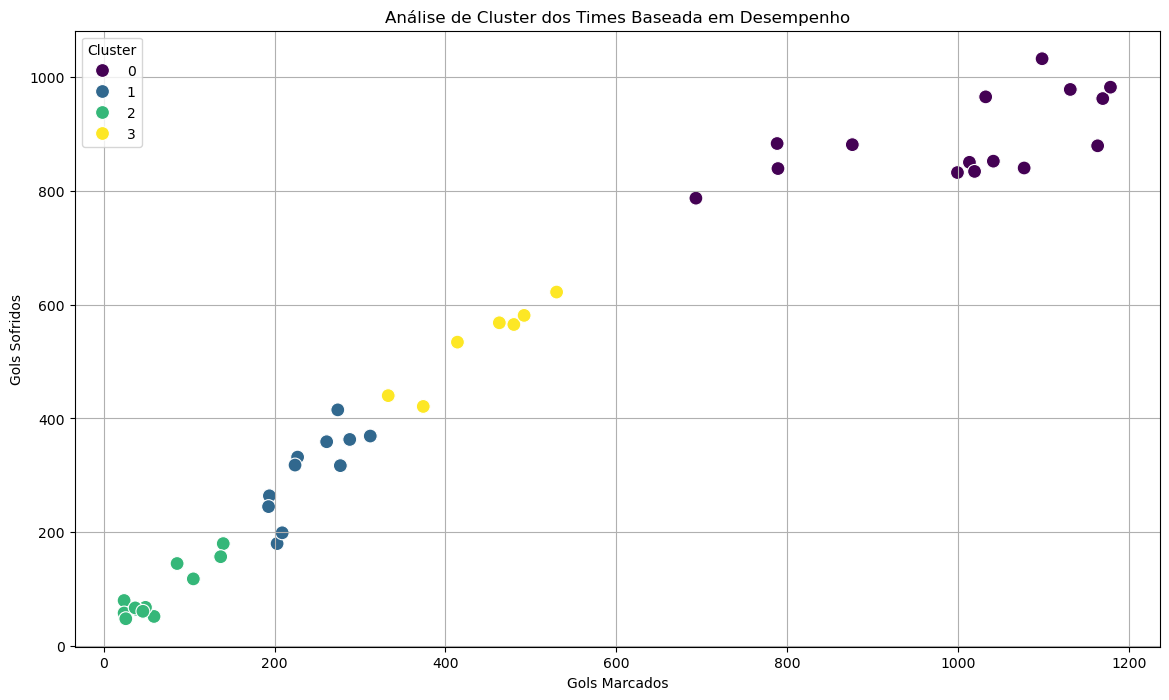

               time  cluster
41        sao paulo        0
16         cruzeiro        0
43            vasco        0
14         coritiba        0
13      corinthians        0
23            goias        0
24           gremio        0
27    internacional        0
21       fluminense        0
20         flamengo        0
32        palmeiras        0
4       atletico-mg        0
2      athletico-pr        0
39           santos        0
8       botafogo-rj        0
31          nautico        1
33           parana        1
34         paysandu        1
40      sao caetano        1
0        america-mg        1
15         criciuma        1
12      chapecoense        1
11            ceara        1
3       atletico-go        1
5              avai        1
9        bragantino        1
18           cuiaba        2
36       portuguesa        2
1        america-rn        2
7           barueri        2
29        joinville        2
28         ipatinga        2
10      brasiliense        2
26          gu

In [115]:
# Extrair o ano da coluna 'data'
df_partidas['ano'] = df_partidas['data'].dt.year

# Calcular vitórias, derrotas e empates como mandante e visitante
df_partidas['vitoria_mandante'] = df_partidas['mandante_Placar'] > df_partidas['visitante_Placar']
df_partidas['vitoria_visitante'] = df_partidas['visitante_Placar'] > df_partidas['mandante_Placar']
df_partidas['empate'] = df_partidas['mandante_Placar'] == df_partidas['visitante_Placar']

# Agrupar por time e calcular o total de vitórias, derrotas e empates
desempenho_mandante = df_partidas.groupby('mandante').agg(
    vitorias=('vitoria_mandante', 'sum'),
    derrotas=('vitoria_visitante', 'sum'),
    empates=('empate', 'sum'),
    gols_marcados=('mandante_Placar', 'sum'),
    gols_sofridos=('visitante_Placar', 'sum')
).reset_index()

desempenho_visitante = df_partidas.groupby('visitante').agg(
    vitorias=('vitoria_visitante', 'sum'),
    derrotas=('vitoria_mandante', 'sum'),
    empates=('empate', 'sum'),
    gols_marcados=('visitante_Placar', 'sum'),
    gols_sofridos=('mandante_Placar', 'sum')
).reset_index()

# Combinar os dados de desempenho como mandante e visitante
desempenho_mandante = desempenho_mandante.rename(columns={'mandante': 'time'})
desempenho_visitante = desempenho_visitante.rename(columns={'visitante': 'time'})
desempenho_total = desempenho_mandante.merge(desempenho_visitante, on='time', suffixes=('_mandante', '_visitante'))

# Calcular totais combinados
desempenho_total['vitorias'] = desempenho_total['vitorias_mandante'] + desempenho_total['vitorias_visitante']
desempenho_total['derrotas'] = desempenho_total['derrotas_mandante'] + desempenho_total['derrotas_visitante']
desempenho_total['empates'] = desempenho_total['empates_mandante'] + desempenho_total['empates_visitante']
desempenho_total['gols_marcados'] = desempenho_total['gols_marcados_mandante'] + desempenho_total['gols_marcados_visitante']
desempenho_total['gols_sofridos'] = desempenho_total['gols_sofridos_mandante'] + desempenho_total['gols_sofridos_visitante']

# Selecionar as colunas relevantes para a análise de cluster
cluster_data = desempenho_total[['vitorias', 'derrotas', 'empates', 'gols_marcados', 'gols_sofridos']]

# Aplicar KMeans para agrupar os times
kmeans = KMeans(n_clusters=4, random_state=42)
desempenho_total['cluster'] = kmeans.fit_predict(cluster_data)

# Visualizar os clusters
plt.figure(figsize=(14, 8))
sns.scatterplot(data=desempenho_total, x='gols_marcados', y='gols_sofridos', hue='cluster', palette='viridis', s=100)
plt.title('Análise de Cluster dos Times Baseada em Desempenho')
plt.xlabel('Gols Marcados')
plt.ylabel('Gols Sofridos')
plt.legend(title='Cluster')
plt.grid()
plt.savefig('analise_cluster_desempenho.png')
plt.show()

# Exibir os times e seus respectivos clusters
print(desempenho_total[['time', 'cluster']].sort_values(by='cluster'))